# 1. Project Overview

## Background and Motivation

This Project is a Harvard CS course project.

According to the U.S. Department of Energy, **buildings consume about 40% of all energy** used in the US. 

Acting on this can help acting on climate change.


In this project, we will apply **machine learning** methods to **predict energy demand of buildings based on time, weather and historical data**. 

This type of modeling is frequently applied to energy demand prediction for smart grid technologies and energy saving verification for building commissioning. 

In the past, Neural Networks were most commonly used for these tasks. We would like to apply more machine learning methods to such prediction.


## Introduction Video

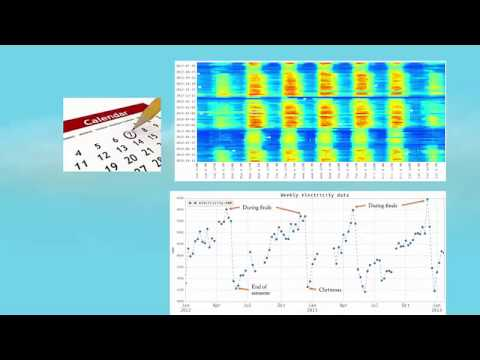

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('JiAQxctOntQ')

# 2. Data Wrangling

For some large scale buildings in Harvard, <b>there are three types energy consumption, electricity, chilled water and steam. Chilled water is for cooling and steam is for heating</b>.

<img src="Pics/chilled water and steam.jpg", style="width:50%">

We picked one building and got energy consumption data **from 2011/07/01 to 2014/10/31**. 

## Voila !

In [7]:
from IPython.display import HTML
HTML('<iframe src="https://giphy.com/embed/3o7TKRx5nY0JGt41KE" width="480" height="330" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/hulu-modern-family-3o7TKRx5nY0JGt41KE">via GIPHY</a></p>')

# 3. Exploratory Data Analysis

## Monthly energy consumption
<img src="Pics/monthly_consumption.jpg", style="width:90%">


## Electricity consumption pattern

Electricity shows a strong periodical pattern. You can clearly see the difference between day and night, weekdays and weekends.
<img src="Pics/hourly electricity.png", style="width:50%">


In [3]:
%matplotlib inline 

import requests 
# from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib

matplotlib.pyplot.style.use('default')

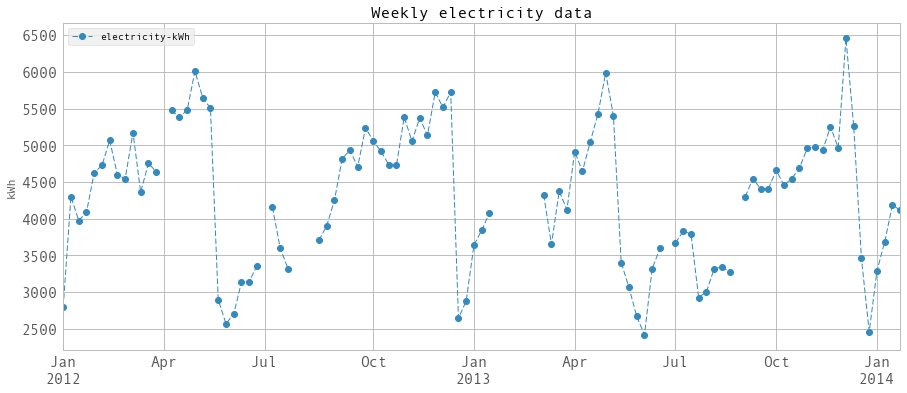

In [26]:
dailyElectricity_with_features = pd.read_excel('Data/dailyElectricityWithFeatures.xlsx')
dailyElectricity = dailyElectricity_with_features[['electricity-kWh', 'startDay','endDay']]

weeklyElectricity = dailyElectricity.asfreq('W', how='sume', normalize=False)

plt.figure()
fig = weeklyElectricity['2012-01':'2014-01'].plot(figsize = (15, 6), fontsize = 15, marker = 'o', linestyle='--')
fig.set_facecolor('w')
plt.title('Weekly electricity data', fontsize = 16)
plt.ylabel('kWh')
ax = plt.gca()
plt.show()

It looks like during each semester, electricity use ramps up toward a peak at finals, perhaps representative of studying patterns. The students are working harder and harder toward finals. Then there is a dip after semesters end, including Christmas vacation. The electricity consumption is relatively low during January and summer terms, and spring break, when campus can be relatively empty.

<img src="Pics/Weekly-electricity.jpg", style="width:100%">


## Relationship between energy consumption and features

In [29]:
dailyElectricityWithFeatures = pd.read_excel('Data/dailyElectricityWithFeatures.xlsx')
dailyChilledWaterWithFeatures = pd.read_excel('Data/dailyChilledWaterWithFeatures.xlsx')
dailySteamWithFeatures = pd.read_excel('Data/dailySteamWithFeatures.xlsx')

# An example of Dataframe
dailyChilledWaterWithFeatures.head()

,chilledWater-TonDays,startDay,endDay,RH-%,T-C,Tdew-C,pressure-mbar,solarRadiation-W/m2,windDirection,windSpeed-m/s,humidityRatio-kg/kg,coolingDegrees,heatingDegrees,dehumidification,occupancy
2012-01-01,0.961857,2012-01-01,2012-01-02,76.652174,7.173913,3.073913,1004.956522,95.260870,236.086957,4.118361,0.004796,0.0,7.826087,0.0,0.0
2012-01-02,0.981725,2012-01-02,2012-01-03,55.958333,5.833333,-2.937500,994.625000,87.333333,253.750000,5.914357,0.003415,0.0,9.166667,0.0,0.3
2012-01-03,1.003672,2012-01-03,2012-01-04,42.500000,-3.208333,-12.975000,1002.125000,95.708333,302.916667,6.250005,0.001327,0.0,18.208333,0.0,0.3
2012-01-04,1.483192,2012-01-04,2012-01-05,41.541667,-7.083333,-16.958333,1008.250000,98.750000,286.666667,5.127319,0.000890,0.0,22.083333,0.0,0.3
2012-01-05,3.465091,2012-01-05,2012-01-06,46.916667,-0.583333,-9.866667,1002.041667,90.750000,258.333333,5.162041,0.001746,0.0,15.583333,0.0,0.3


### Features Description.

<p><b> coolingDegrees</b>: if T-C - 12 > 0, then = T-C - 12, else = 0. Assume that when outdoor temperature is below 12C, no cooling is needed, which is true for many buildings. This will be useful for daily prediction, because the average of hourly cooling degrees is better than average of hourly temperature.</p>
<p><b> cosHour</b>: $\text{cos}(\text{hourOfDay} \cdot \frac{2\pi}{24})$</p>
<p><b> dehumidification</b>: if humidityRatio - 0.00886 > 0, then = humidityRatio - 0.00886, else = 0. This will be useful for chilled water prediction, especially daily chilled water prediction.</p>
<p><b> heatingDegrees</b>: if 15 - T-C > 0, then = 15 - T-C, else = 0. Assume that when outdoor temperature is above 15C, no heating is needed. This will be useful for daily prediction, because the average of hourly heating degrees is better than average of hourly temperature.</p>
<p><b> occupancy</b>: A number between 0 and 1. 0 indicated no occupants, 1 indicates normal occupancy. This is an estimate based on holidays, weekends and school academic calendar.</p>
<p><b> pressure-mbar</b>: atmospheric pressure</p>
<p><b> RH-% </b>: Relative humidity</p>
<p><b> T-C </b>: Dry-bulb temperature</p>
<p><b> Tdew-C </b>: Dew-point temperature</p>

<b>Humidity ratio</b>: Humidity ratio is calcluated based on T-C, RH and pressure. Humidity ratio is important for chilled water prediction as chilled water is also used to dry the air discharged to rooms. Using humidity ratio will be more efficient and effective than using RH and dew point temperature.

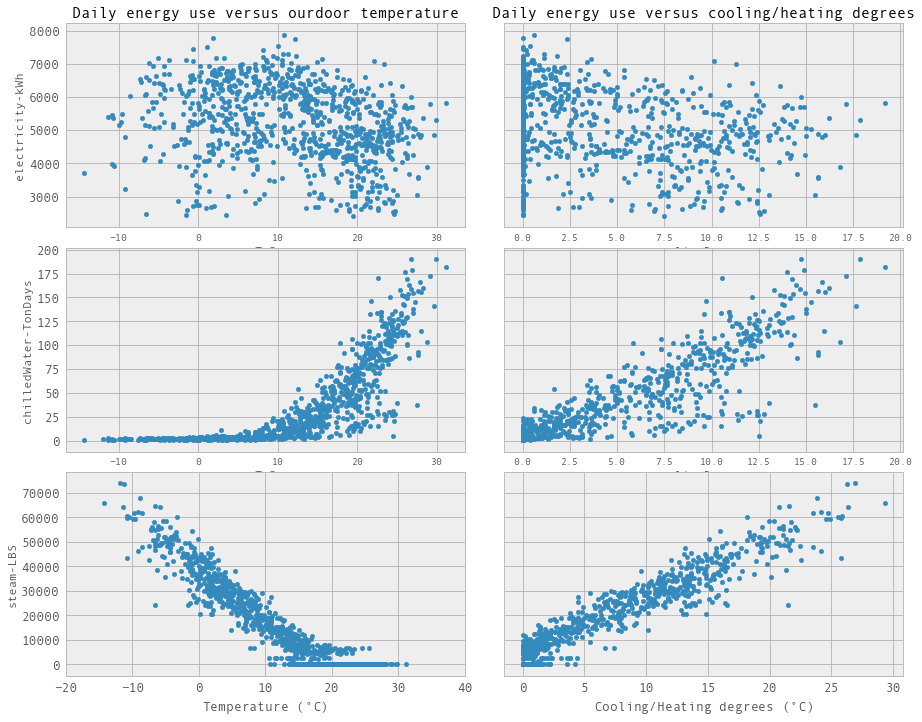

In [30]:
fig, ax = plt.subplots(3, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'coolingDegrees', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'T-C', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'heatingDegrees', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Temperature ($^\circ$C)', fontsize = 13)
ax[2,0].set_xlim([-20,40])
ax[0,0].set_title('Daily energy use versus ourdoor temperature', fontsize = 15)

ax[2,1].set_xlabel(r'Cooling/Heating degrees ($^\circ$C)', fontsize = 13)
#ax[2,1].set_xlim([0,30])
ax[0,1].set_title('Daily energy use versus cooling/heating degrees', fontsize = 15)

plt.show()

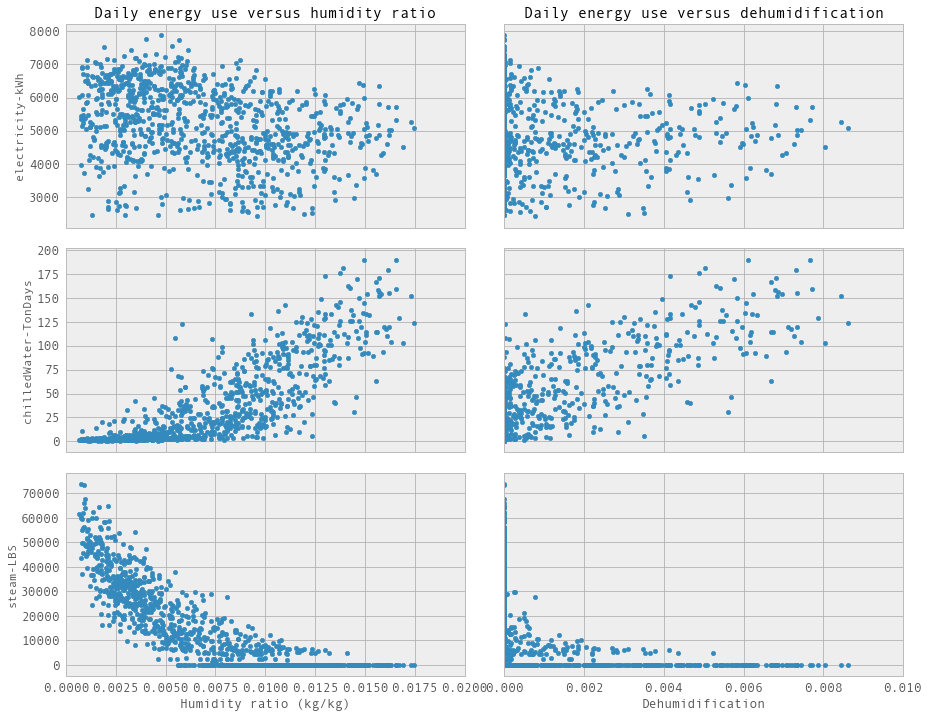

In [31]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'humidityRatio-kg/kg', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'dehumidification', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Humidity ratio (kg/kg)', fontsize = 13)
ax[2,0].set_xlim([0,0.02])
ax[0,0].set_title('Daily energy use versus humidity ratio', fontsize = 15)

ax[2,1].set_xlabel(r'Dehumidification', fontsize = 13)
ax[2,1].set_xlim([0,0.01])
ax[0,1].set_title('Daily energy use versus dehumidification', fontsize = 15)

plt.show()

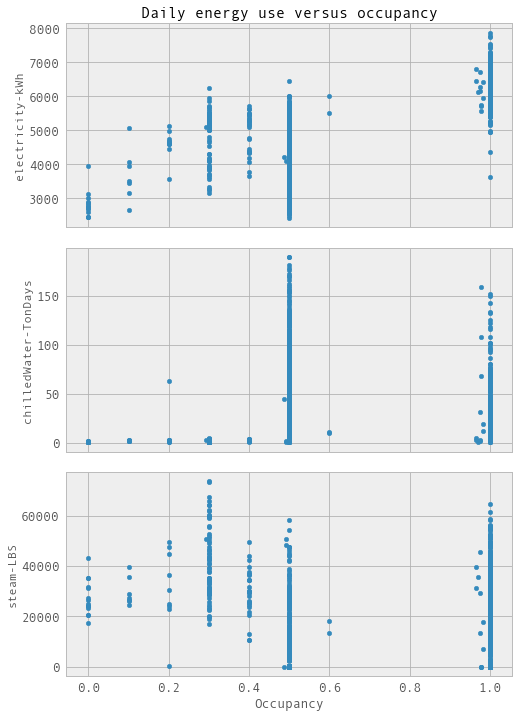

In [38]:
fig, ax = plt.subplots(3, 1, sharex = 'col', figsize = (8, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'electricity-kWh', ax = ax[0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'chilledWater-TonDays', ax = ax[1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'occupancy', y = 'steam-LBS', ax = ax[2])

for i in range(3):    
    ax[i].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

  
ax[2].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2].set_xlabel(r'Occupancy', fontsize = 13)
ax[0].set_title('Daily energy use versus occupancy', fontsize = 15)

plt.show()

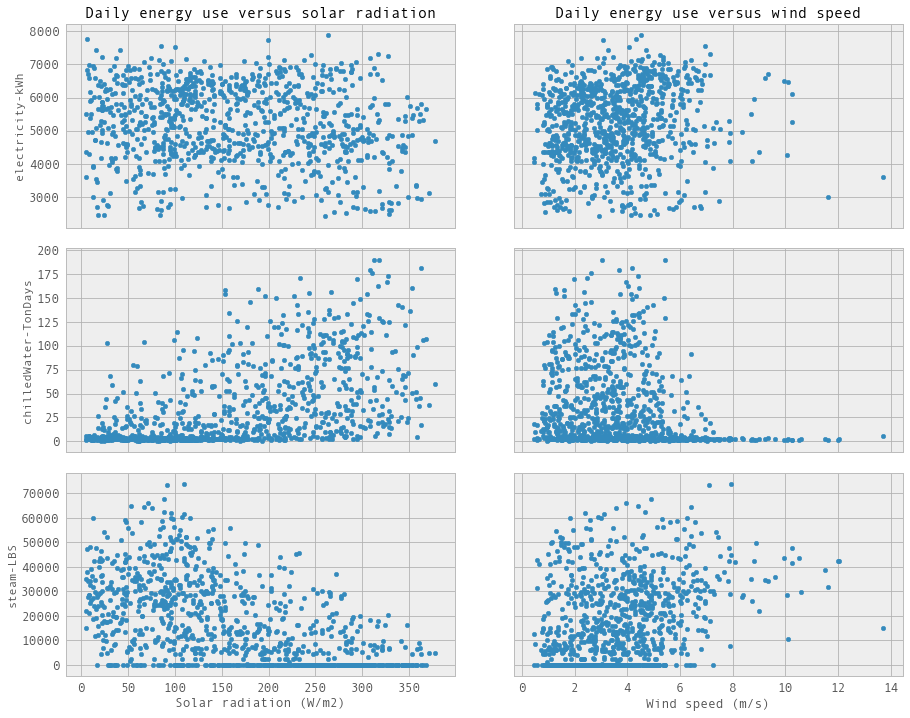

In [39]:
fig, ax = plt.subplots(3, 2, sharex = 'col', sharey = 'row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.1, wspace = 0.15)

dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'electricity-kWh', ax = ax[0,0])
dailyElectricityWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'electricity-kWh', ax = ax[0,1])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'chilledWater-TonDays', ax = ax[1,0])
dailyChilledWaterWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'chilledWater-TonDays', ax = ax[1,1])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'solarRadiation-W/m2', y = 'steam-LBS', ax = ax[2,0])
dailySteamWithFeatures.plot(kind = 'scatter', x = 'windSpeed-m/s', y = 'steam-LBS', ax = ax[2,1])

for i in range(3):    
    ax[i,0].tick_params(which=u'major', reset=False, axis = 'y', labelsize = 13)
    #ax[i,0].set_axis_bgcolor('w')

for i in range(2):    
    ax[2,i].tick_params(which=u'major', reset=False, axis = 'x', labelsize = 13)

ax[2,0].set_xlabel(r'Solar radiation (W/m2)', fontsize = 13)
ax[0,0].set_title('Daily energy use versus solar radiation', fontsize = 15)

ax[2,1].set_xlabel(r'Wind speed (m/s)', fontsize = 13)

ax[0,1].set_title('Daily energy use versus wind speed', fontsize = 15)

plt.show()

**Electricity is not co-related with weather data (temperature)**. The idea of using weather information to predict electricity will NOT work. 

It mostly depends on time/occupancy.

**Chilled water and steam are strongly co-related with temperature and humidity**. Daily chilled water and steam consumption have a good linear relationship with cooling and heating degrees. Therefore, simple linear regression might already be accurate enough.

However, using with weather information to predict hourly chilled water and steam is not sufficient. Occupancy and operation schedule must be included in hourly chilled water and steam prediction.

Humidity ratio definitely will help predict chilled water consumption.

Cooling and heating degrees will help predict daily chilled water and steam.

# 4 Prediction Using Linear Regression
